In [154]:
import pandas as pd
import numpy as np

# correlation
df0 = pd.read_csv("../data/prices_round_2_day_-1.csv", sep=";")
df1 = pd.read_csv("../data/prices_round_2_day_0.csv", sep=";")
df2 = pd.read_csv("../data/prices_round_2_day_1.csv", sep=";")

In [16]:
#df = pd.concat([df0, df1, df2], ignore_index=True)
#print(df.columns)

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')


In [173]:
df1


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,p
0,1,0,PINA_COLADAS,15013,34,15012.0,54.0,0.0,0.0,15016,88,0.0,0.0,0.0,0.0,15014.5,0.0,15014.193182
2,1,0,COCONUTS,8003,200,0.0,0.0,0.0,0.0,8006,200,0.0,0.0,0.0,0.0,8004.5,0.0,8004.500000
5,1,100,COCONUTS,8003,44,8002.0,104.0,0.0,0.0,8005,148,0.0,0.0,0.0,0.0,8004.0,0.0,8003.648649
6,1,100,PINA_COLADAS,15012,35,15011.0,29.0,15010.0,52.0,15013,29,15014.0,52.0,0.0,0.0,15012.5,0.0,15012.000000
10,1,200,COCONUTS,8003,195,0.0,0.0,0.0,0.0,8005,62,8006.0,133.0,0.0,0.0,8004.0,0.0,8004.341026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39991,1,999700,PINA_COLADAS,14850,29,14849.0,105.0,0.0,0.0,14852,105,0.0,0.0,0.0,0.0,14851.0,118040.0,14850.439331
39993,1,999800,COCONUTS,7923,181,0.0,0.0,0.0,0.0,7926,181,0.0,0.0,0.0,0.0,7924.5,12268.0,7924.500000
39994,1,999800,PINA_COLADAS,14849,101,0.0,0.0,0.0,0.0,14852,101,0.0,0.0,0.0,0.0,14850.5,117044.0,14850.500000
39996,1,999900,PINA_COLADAS,14850,21,14849.0,62.0,0.0,0.0,14853,83,0.0,0.0,0.0,0.0,14851.5,115804.0,14851.126506


In [162]:
df1=df2
df1 = df1[(df1['product']=='PINA_COLADAS') | (df1['product']=='COCONUTS')]
#df1['p'] = df1['bid_price_1'] + df1['bid_price_2']
df1 = df1.fillna(0)
df1['p'] = (df1['bid_price_1']*df1['bid_volume_1'] +
            df1['bid_price_2']*df1['bid_volume_2'] +
    df1['bid_price_3']*df1['bid_volume_3'] +
    df1['ask_price_1']*df1['ask_volume_1'] +
    df1['ask_price_2']*df1['ask_volume_2'] +
    df1['ask_price_3']*df1['ask_volume_3']) / (df1['bid_volume_1']+df1['bid_volume_2'] +
                                              df1['bid_volume_3'] + df1['ask_volume_1'] +
                                              df1['ask_volume_2'] + df1['ask_volume_3']) 

coco = df1[df1['product']=='COCONUTS']
pina = df1[df1['product']=='PINA_COLADAS']
c = coco['p'].to_numpy()
p = pina['p'].to_numpy()
np.corrcoef(c, p)


array([[1.        , 0.81301694],
       [0.81301694, 1.        ]])

In [163]:
prices = pd.DataFrame({'coco':c, 'pina':p})

prices['div'] = prices['coco']/prices['pina']
prices['div2'] = prices['pina']/prices['coco']
prices['sub'] = prices['coco']-prices['pina']

In [167]:
prices['edgeC'] = -prices['coco']/2+8*prices['pina']/15/2
prices['edgeP'] = -prices['pina']/2+15/8/2*prices['coco']
prices

,coco,pina,div,div2,sub,edgeC,edgeP
0,8004.500000,15014.193182,0.533129,1.875719,-7009.693182,1.534848,-2.877841
1,8003.648649,15012.000000,0.533150,1.875645,-7008.351351,1.375676,-2.579392
2,8004.341026,15016.160550,0.533048,1.876002,-7011.819525,2.138967,-4.010564
3,8004.627500,15015.500000,0.533091,1.875852,-7010.872500,1.819583,-3.411719
4,8003.500000,15013.500000,0.533087,1.875867,-7010.000000,1.850000,-3.468750
...,...,...,...,...,...,...,...
9995,7924.500000,14850.834951,0.533606,1.874041,-6926.334951,-2.027346,3.801274
9996,7925.000000,14854.183432,0.533520,1.874345,-6929.183432,-1.384418,2.595784
9997,7923.666667,14850.439331,0.533564,1.874188,-6926.772664,-1.716179,3.217835
9998,7924.500000,14850.500000,0.533618,1.873998,-6926.000000,-2.116667,3.968750


In [165]:
prices = pd.DataFrame({'coco':c, 'pina':p})

prices['div'] = prices['coco']/prices['pina']
prices['div2'] = prices['pina']/prices['coco']
prices['sub'] = prices['coco']-prices['pina']

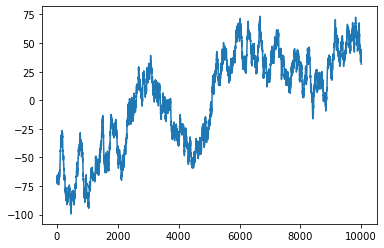

In [141]:
import matplotlib.pyplot as plt
plt.plot(prices['sub'])


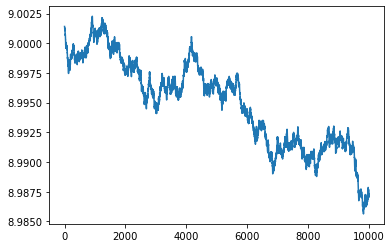

In [150]:
#plt.plot(prices['div'])
plt.plot(np.log(prices['coco']))
#plt.plot(np.log(prices['pina']))
#plt.plot(prices['sub'])

(array([ 221.,  428.,  438.,  462., 1368., 1737., 2295., 2038.,  717.,
         296.]),
 array([-62.13352273, -54.41313241, -46.69274209, -38.97235178,
        -31.25196146, -23.53157115, -15.81118083,  -8.09079051,
         -0.3704002 ,   7.34999012,  15.07038043]),
 <BarContainer object of 10 artists>)

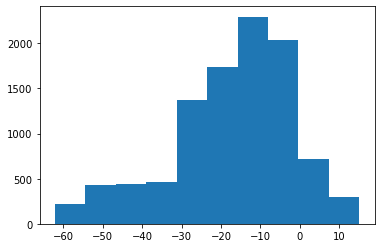

In [172]:
plt.hist(prices['edgeP'])

In [17]:
df_pina = df[df['symbol'] == "PINA_COLADAS"].reset_index()
df_coco = df[df["symbol"] == "COCONUTS"].reset_index()

KeyError: 'symbol'

In [15]:
df1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,COCONUTS,8113,205,NaN,NaN,NaN,NaN,8116,205,NaN,NaN,NaN,NaN,8114.5,0.0
2,0,0,BANANAS,4893,1,4892.0,30.0,NaN,NaN,4899,30,NaN,NaN,NaN,NaN,4896.0,0.0
3,0,0,PINA_COLADAS,15225,82,NaN,NaN,NaN,NaN,15228,82,NaN,NaN,NaN,NaN,15226.5,0.0
4,0,100,COCONUTS,8113,192,NaN,NaN,NaN,NaN,8115,70,8116.0,122.0,NaN,NaN,8114.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,999800,BANANAS,4869,27,NaN,NaN,NaN,NaN,4876,27,NaN,NaN,NaN,NaN,4872.5,123648.0
39996,0,999900,COCONUTS,8002,190,NaN,NaN,NaN,NaN,8005,190,NaN,NaN,NaN,NaN,8003.5,432688.0
39997,0,999900,PEARLS,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,-408.0
39998,0,999900,BANANAS,4870,23,NaN,NaN,NaN,NaN,4876,2,4877.0,21.0,NaN,NaN,4873.0,121460.0


0            NaN
1       1.000000
2      -0.500000
3      -0.523205
4       0.497241
          ...   
1073         NaN
1074         NaN
1075         NaN
1076         NaN
1077         NaN
Name: price, Length: 1078, dtype: float64
0            NaN
1       1.903833
2      -0.936307
3      -0.980243
4       0.951896
          ...   
1073         NaN
1074         NaN
1075         NaN
1076         NaN
1077         NaN
Name: price, Length: 1078, dtype: float64


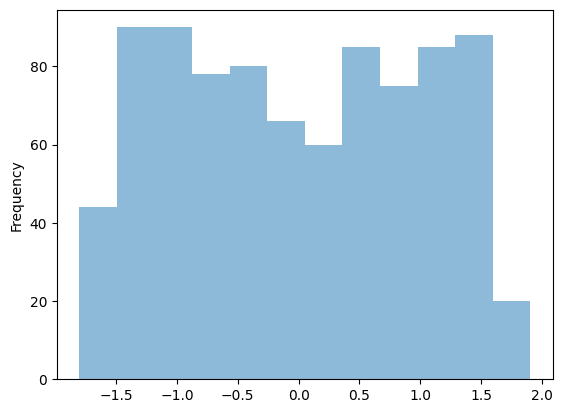

In [29]:
corr = df_pina["price"].corr(df_coco["price"])
#print(corr)

rolling_corr = df_pina["price"].rolling(10, min_periods=1).corr(df_coco["price"])
print(rolling_corr)
# Compute the z-score of the rolling correlation
zscore = (rolling_corr - rolling_corr.mean()) / rolling_corr.std()
zscore.plot.hist(bins=12, alpha=0.5)
print(zscore)

In [4]:
import pandas as pd
import numpy as np

df0 = pd.read_csv("../data/prices_round_2_day_-1.csv", sep=";")
df1 = pd.read_csv("../data/prices_round_2_day_0.csv", sep=";")
df2 = pd.read_csv("../data/prices_round_2_day_1.csv", sep=";")

In [5]:
df1 = df1[(df1['product']=='PINA_COLADAS') | (df1['product']=='COCONUTS')]
#df1['p'] = df1['bid_price_1'] + df1['bid_price_2']
df1 = df1.fillna(0)
df1['p'] = (df1['bid_price_1']*df1['bid_volume_1'] +
            df1['bid_price_2']*df1['bid_volume_2'] +
    df1['bid_price_3']*df1['bid_volume_3'] +
    df1['ask_price_1']*df1['ask_volume_1'] +
    df1['ask_price_2']*df1['ask_volume_2'] +
    df1['ask_price_3']*df1['ask_volume_3']) / (df1['bid_volume_1']+df1['bid_volume_2'] +
                                              df1['bid_volume_3'] + df1['ask_volume_1'] +
                                              df1['ask_volume_2'] + df1['ask_volume_3']) 

coco = df1[df1['product']=='COCONUTS']
pina = df1[df1['product']=='PINA_COLADAS']
c = coco['p'].to_numpy()
p = pina['p'].to_numpy()
np.corrcoef(c, p)

array([[1.        , 0.94018579],
       [0.94018579, 1.        ]])